### Introduction to Python and some important libraries

Creating a numpy array.

#### Numpy

In [1]:
import numpy as np

x = np.array([[1,2,3],
            [4,5,6]])

print(f"{x}")

[[1 2 3]
 [4 5 6]]


#### SciPy

In [2]:
from scipy import sparse

eye = np.eye(4)

print(f"Numpy array:\n{eye}")

Numpy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


#### Create a sparse matrix

In [3]:
sparse_matrix = sparse.csr_matrix(eye)
print(f"SciPy sparse CSR matrix: \n{sparse_matrix}")

SciPy sparse CSR matrix: 
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [4]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print(f"COO representation: \n{eye_coo}")

COO representation: 
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### Plotting

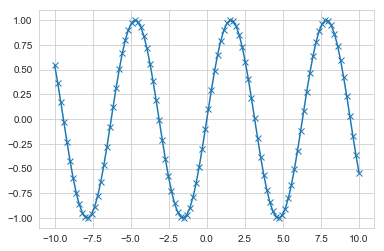

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

x = np.linspace(-10,10, 100)

y = np.sin(x)

plt.plot(x,y, marker = 'x')

#### Pandas

Create a data frame.

In [6]:
import pandas as pd

data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
       'Location': ['New York', 'Paris', 'Berlin', 'London'],
       'Age': [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
data_pandas

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


Pandas filtering.

Filter data greater than 30 years of Age.

In [7]:
data_pandas[data_pandas['Age'] > 30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


### First Application: Classifying Iris Species

<img src="https://www.oreilly.com/library/view/python-artificial-intelligence/9781789539462/assets/462dc4fa-fd62-4539-8599-ac80a441382c.png">

First we import the data set from skelearn.

In [8]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

Lets looks at the data keys

In [9]:
print(f"Keys of iris_dataset:\n{iris_dataset.keys()}")

Keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


We can further explore each keys.

Lets looks at the data descriptions

In [10]:
print(iris_dataset['DESCR'][:230])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    


The data has 150 rows and 4 columns. 

In [11]:
print(f"Target Names: {iris_dataset['target_names']}")

Target Names: ['setosa' 'versicolor' 'virginica']


In [12]:
print(f"Feature Names: {iris_dataset['feature_names']}")

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
print(f"Target data:\n\n{iris_dataset['target']}")

Target data:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We can check the corresponding labels with the above data.

In [14]:
for i in enumerate(iris_dataset['target_names']):
    print(i)

(0, 'setosa')
(1, 'versicolor')
(2, 'virginica')


#### Measuring Success: Training and Testing Data

We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements.

To assess the model’s performance, we show it new data (data that it hasn’t seen
before) for which we have labels. This is usually done by splitting the labeled data we
have collected (here, our 150 flower measurements) into two parts. One part of the
data is used to build our machine learning model, and is called the training data or
training set. The rest of the data will be used to assess how well the model works; this
is called the test data, test set, or hold-out set.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = iris_dataset['data']
y = iris_dataset['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [18]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

#### Plotting the data

In [19]:
iris_df = pd.DataFrame(X_train,
                      columns=iris_dataset.feature_names)

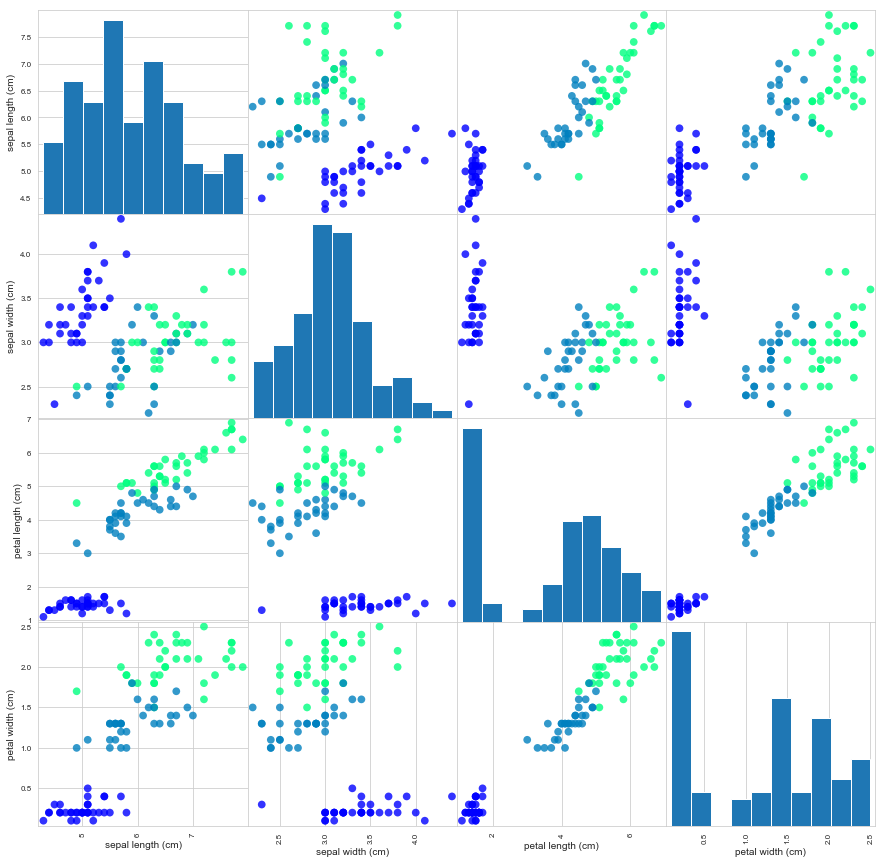

In [20]:
pd.plotting.scatter_matrix(iris_df,
                          c = y_train,
                          figsize=(15,15),
                          marker = 'o',
                          s = 60,
                          alpha = 0.8,
                          cmap='winter');

From the plots, we can see that the three classes seem to be relatively well separated
using the sepal and petal measurements. This means that a machine learning model
will likely be able to learn to separate them.

#### Building Our First Model: k-NEarest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

The `model` object encapsulates the algorithm that will be used to build the model from
the training data, as well the algorithm to make predictions on new data points. It will
also hold the information that the algorithm has extracted from the training data. In
the case of KNeighborsClassifier, it will just store the training set.
To build the model on the training set, we call the fit method of the knn object,
which takes as arguments the NumPy array X_train containing the training data and
the NumPy array y_train of the corresponding training labels:

In [22]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Making Prediction

We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [23]:
X_new = np.array([[5,2.9,1,0.2]])
print(f"X_new.shape{X_new.shape}")

X_new.shape(1, 4)


To make a prediction, we call the predict method of the `model` object:

In [24]:
prediction = model.predict(X_new)
print(f"Prediction: {prediction}")
print(f"Predicted target name: {iris_dataset['target_names'][prediction]}")

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the Model

This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.
Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by
computing the accuracy, which is the fraction of flowers for which the right species
was predicted:

In [25]:
y_pred = model.predict(X_test)
print(f"Test set Prediction:\n{y_pred}")

Test set Prediction:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2]


In [26]:
print(f"Test set score: {np.mean(y_pred == y_test)}")

Test set score: 0.98


In [27]:
print(f"Test set score: {model.score(X_test, y_test)}")

Test set score: 0.98


#### Summary

In this chapter we studied the following:

- Download the Iris data set
- Inspect/plot the data
- Split the data in two sets - Train and Test
- Choose `KNeighborsClassifier` algorithm to train our data
- Made predictions on data that the model had not seen before
- Evaluated the accuracy score of our model